## importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lendo o csv

In [ ]:
titanic = pd.read_csv('/content/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Info gerais

In [ ]:
titanic.info()
#titanic_final = titanic.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

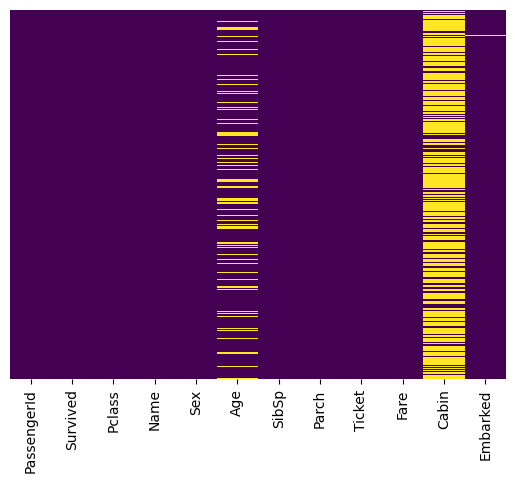

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

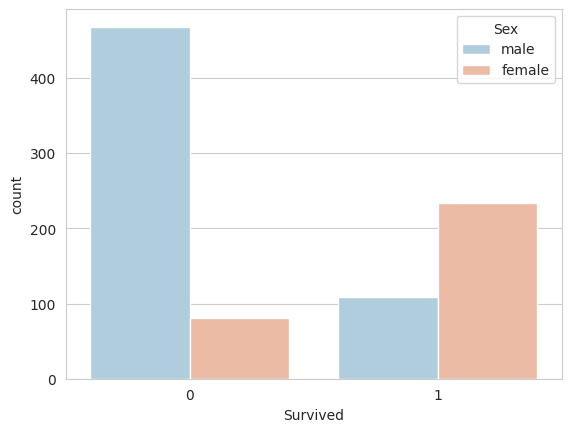

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=titanic,palette="RdBu_r")

## Dados sintéticos

### Técnica 1
 preenchendo as observações que possuem valores ausentes

In [ ]:
titanic = pd.DataFrame(titanic)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('Unknown', inplace=True)
titanic['Embarked'].fillna('Unknown', inplace=True)

### Técnica 2

In [ ]:
#### Para a idade
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return
    elif Pclass == 2:
      return
    else:
      return
  else:
    return Age
titanic["Age"]= titanic[["Age","Pclass"]].apply(impute_age,axis=1)

###  para o gênero

sex= pd.get_dummies(titanic["Sex"],drop_first=True) embarked=pd.get_dummies(titanic["Embarked"],drop_first=True)
titanic.drop(["Sex","Embarked","Name","Ticket"], axis=1,inplace=True)
titanic.drop('Cabin',axis=1,inplace=True)

<Axes: >

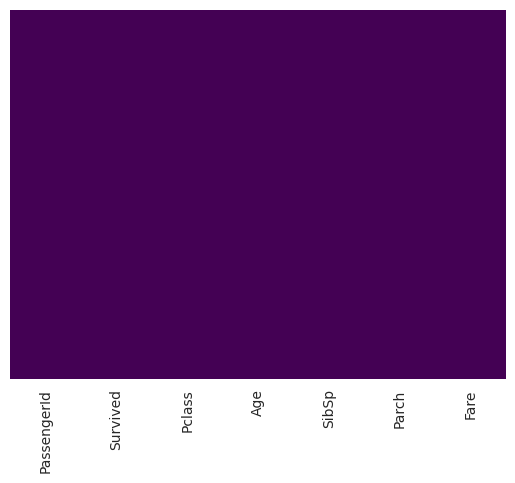

In [19]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## Treinamento

In [21]:
# Removendo colunas não numéricas apenas se elas estiverem presentes
columns_to_drop = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
titanic_numeric = titanic.drop(columns_to_drop, axis=1, errors='ignore')

# Encoding para variáveis categóricas
titanic_encoded = pd.get_dummies(titanic_numeric, columns=['Pclass', 'SibSp', 'Parch'], drop_first=True)

# Dividindo depois do encoding
X_train, X_test, y_train, y_test = train_test_split(titanic_encoded.drop(['Survived'], axis=1), titanic_encoded["Survived"], test_size=0.3, random_state=101)

# Treinando o modelo
logm = LogisticRegression()
logm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predição

In [22]:
pred = logm.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       154
           1       0.73      0.48      0.58       114

    accuracy                           0.71       268
   macro avg       0.71      0.68      0.68       268
weighted avg       0.71      0.71      0.69       268



**precision**: A precisão é a proporção de verdadeiros positivos (VP) em relação ao total de classificados como positivos (soma de VP e falsos positivos, FP)

$Precision = \frac{VP}{VP + FP}$

**Recall**: Recall é a proporção de verdadeiros positivos em relação ao total de classificados como verdadeiros positivos (soma de VP e falsos negativos, FN)

$Recall = \frac{VP}{VP + FN}$

**F1-Score**: O F1-Score é uma métrica que combina precision e recall em um único número. É a média harmônica dessas duas métricas.

**Support**: A contagem real de instâncias em cada classe no conjunto de teste. Mostra quantas instâncias realmente pertencem a cada classe.

**Accuracy (Acurácia)**: A acurácia é a proporção de classificações corretas em relação ao total de instâncias.

$Acuracia = \frac{VP + VN}{VP + VN + FP + FN}$

## Matriz de confusão

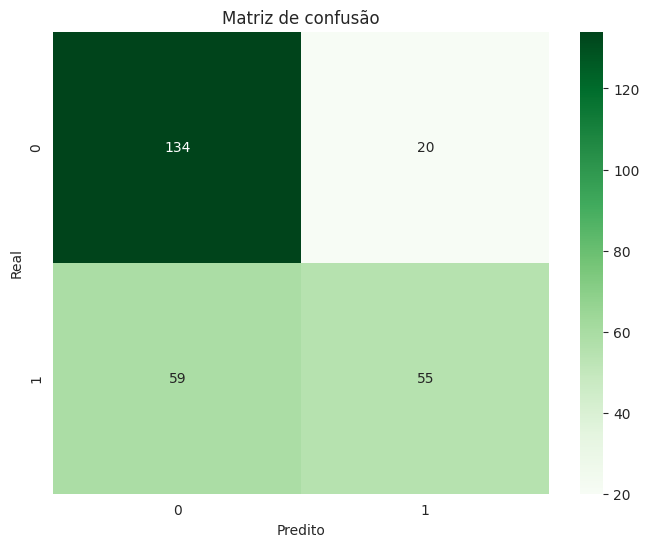

In [23]:
matriz = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()


**Verdadeiros Negativos**: O modelo classificou corretamente 134 como "não sobreviveu".

**Falsos Positivos**: classificou 20 como "sobreviveu" quando na verdade não sobreviveram *(erro do tipo I)*.

**Falsos Negativos**: classificou incorretamente 59 como "não sobreviveu" quando na verdade sobreviveram *(erro do tipo II)*.

**Verdadeiros Positivos**: classificou corretamente 55 como "sobreviveu".